<h1>Project Description</h1><br>
Our main aim is to develop a classification model to classify airline tweets as positive, negative and neutral.<br>
The model we are using is a Random Forest Classifier.<br>
We have been able to classify tweets with 75.82% accuracy <br>
Majority of the efforts have been channeled around data preprocessing and vectorization.<br> 
Extensive use of regular expressions are made to strip away things like punctuations, emojis, and other non useful characters<br>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing Data

In [2]:
pd.options.display.max_rows = 10

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Sidharth37/Airline-Tweets-Sentiment-Analysis---Natural-Language-Processing/main/Tweets.csv')
print(df.size)
df.head(5)

219600


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Exploratory Data Analysis

In [4]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

<AxesSubplot:ylabel='airline_sentiment'>

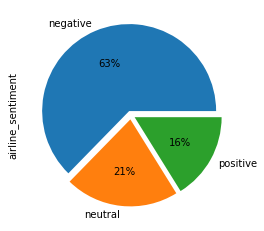

In [5]:
df['airline_sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%',explode=[0.05]*3)

<b>Majority of the tweets are predominantly Negative.

In [6]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

<AxesSubplot:ylabel='airline'>

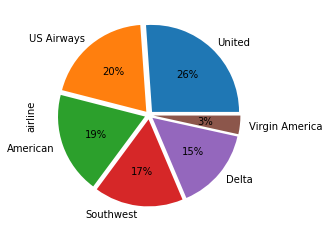

In [7]:
df['airline'].value_counts().plot(kind='pie',autopct='%1.0f%%',explode=[0.05]*6)

<b>Based on the initial look, we can say that the tweets correspond to 6 major airlines. Further, these tweets are divided into 3 sentiments as positive, negative and neutral.

In [8]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

<b>A quick glance at the above 2 list gives us the reasons for negative tweets.

In [10]:
df['user_timezone'].unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', nan,
       'Mountain Time (US & Canada)', 'Vienna', 'Caracas', 'Kuala Lumpur',
       'Brisbane', 'Arizona', 'London', 'Tehran', 'Alaska', 'Sydney',
       'Irkutsk', 'Santiago', 'Amsterdam', 'Tijuana', 'Abu Dhabi',
       'Central America', 'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris',
       'Guam', 'New Delhi', 'Stockholm', 'America/Chicago', 'Berlin',
       'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome', 'Beijing',
       'Mexico City', 'Bern', 'Singapore', 'Indiana (East)', 'Melbourne',
       'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest',
       'Greenland', 'Prague', 'New Caledonia', 'Bogota', 'Seoul',
       'Sarajevo', 'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen',
       'Hong Kong', 'Guadalajara', 'Mid-Atlantic', 'Mazatlan',
       'Buenos Aires', 'America/Los_Angeles', 'Dublin', 'Lisbon',
 

In [11]:
pd.DataFrame(df['tweet_location'].unique())

,0
0,NaN
1,Lets Play
2,San Francisco CA
3,Los Angeles
4,San Diego
...,...
3077,"Chelmsford, MA"
3078,"Pueblo, CO"
3079,"Columbus, OH, USA"
3080,"Milwaukee County, Wisconsin"


<AxesSubplot:>

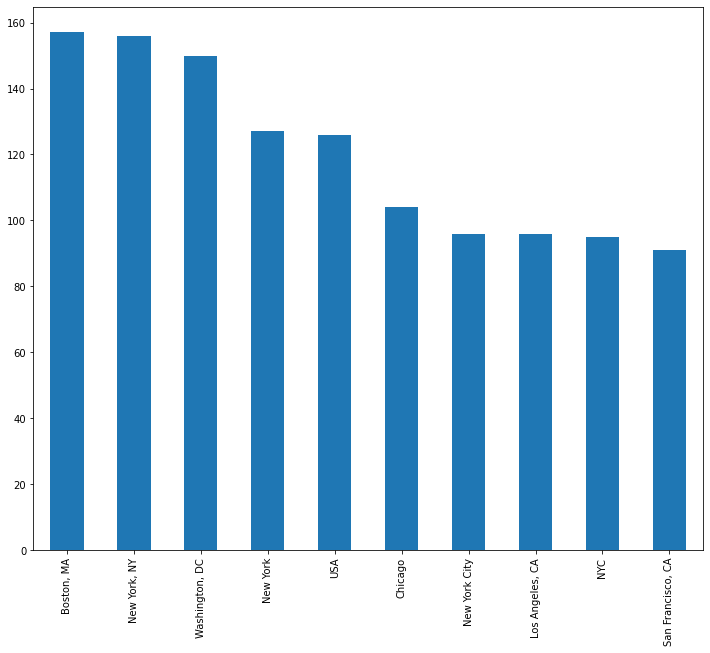

In [12]:
df['tweet_location'].value_counts()[:10].plot(kind='bar',figsize=(12,10))

In [13]:
df['user_timezone'].unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', nan,
       'Mountain Time (US & Canada)', 'Vienna', 'Caracas', 'Kuala Lumpur',
       'Brisbane', 'Arizona', 'London', 'Tehran', 'Alaska', 'Sydney',
       'Irkutsk', 'Santiago', 'Amsterdam', 'Tijuana', 'Abu Dhabi',
       'Central America', 'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris',
       'Guam', 'New Delhi', 'Stockholm', 'America/Chicago', 'Berlin',
       'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome', 'Beijing',
       'Mexico City', 'Bern', 'Singapore', 'Indiana (East)', 'Melbourne',
       'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest',
       'Greenland', 'Prague', 'New Caledonia', 'Bogota', 'Seoul',
       'Sarajevo', 'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen',
       'Hong Kong', 'Guadalajara', 'Mid-Atlantic', 'Mazatlan',
       'Buenos Aires', 'America/Los_Angeles', 'Dublin', 'Lisbon',
 

<AxesSubplot:>

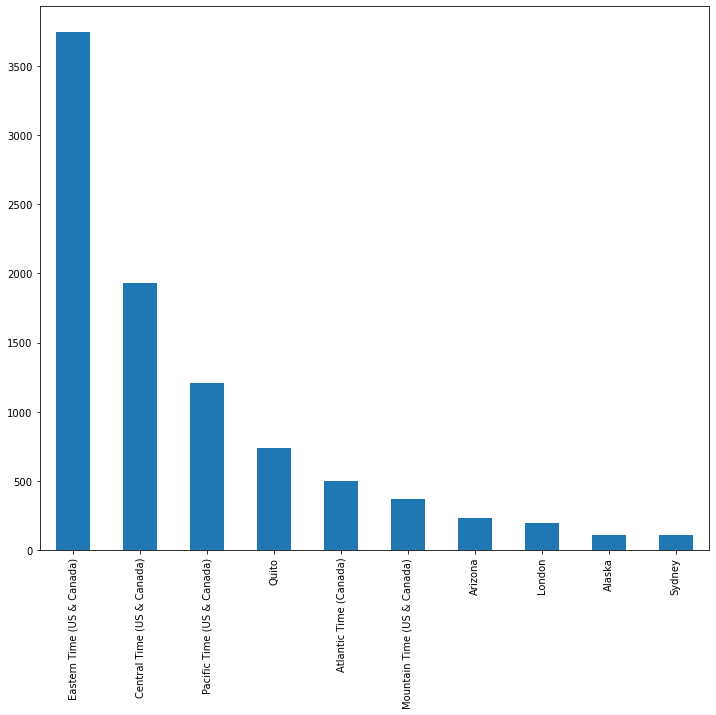

In [14]:
df['user_timezone'].value_counts()[:10].plot(kind='bar',figsize=(12,10))


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<b>Based on the tweet_location field and the user timezone field, we can say that majority of the tweets are from the USA. Although both these fields do not contain perfect values, we can draw a general conclusion. While determining the merit of the conclusion, keep in mind that we have tweet locations and timezone values for roughly 66% of the data

In [16]:
pd.DataFrame(pd.to_datetime(df['tweet_created'], utc=False)).min()

tweet_created   2015-02-16 23:36:05-08:00
dtype: datetime64[ns, pytz.FixedOffset(-480)]

In [17]:
pd.DataFrame(pd.to_datetime(df['tweet_created'], utc=False)).max()

tweet_created   2015-02-24 11:53:37-08:00
dtype: datetime64[ns, pytz.FixedOffset(-480)]

<b>All of these tweets were sampled between the dates 16th February to 24th February, both inclusive. 

In [18]:
df.groupby('airline_sentiment').mean()['airline_sentiment_confidence']

airline_sentiment
negative    0.933365
neutral     0.823303
positive    0.872039
Name: airline_sentiment_confidence, dtype: float64

In [19]:
df.groupby('airline_sentiment').median()['airline_sentiment_confidence']

airline_sentiment
negative    1.000
neutral     0.916
positive    1.000
Name: airline_sentiment_confidence, dtype: float64

<b>The confidence of all of the sentiments generally seem to be on the higher side. This makes us confident about the data we are using to train our classification model. 

In [20]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
      ...  
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, Length: 18, dtype: int64

<b>Based on the retweet counts, it indicates that these tweets belong to normal individuals rather than famous personalities

<b>Based on the analysis of our existing dataset we can say that our data is predominantly made of negative tweets, pertaining to 6 major airlines. These tweets have been predominantly made in the USA, by average travellers(not famous personalities).<br><br>
It is very important to understand this as it gives us the sense of the lingo on which our model will be built on. 
<br><br>
Additional information on the rates and occupation of the travellers could help us better understand the backgrounds of the travellers, and in turn make us even more aware of the lingo we are building our model on.

# Data Pre-processing

In [21]:
tweets=df['text']
tweets

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [22]:
sentiments=df['airline_sentiment']
sentiments

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

<h3>Preprocessing tweets

<b>Removing special characters

In [23]:
tweets=tweets.tolist()


In [24]:
tweets
tweets_cleaned=[]

In [25]:
for i in tweets:
    tweets_cleaned.append(re.sub('@[A-Za-z0-9]+','',i))
tweets=tweets_cleaned
    

In [26]:
tweets_cleaned=[]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
for i in tweets:
    tweets_cleaned.append(emoji_pattern.sub(r'', i))
tweets=tweets_cleaned


In [27]:
tweets_cleaned=[]
for i in tweets:
    tweets_cleaned.append(re.sub(r'http\S+', '', i))
tweets=tweets_cleaned


In [28]:
tweets_cleaned=[]
for i in tweets:
    tweets_cleaned.append(re.sub(r'#', '', i))
tweets=tweets_cleaned


In [29]:
tweets_cleaned=[]
for i in tweets:
    tweets_cleaned.append(re.sub(r"[^\w\d'\s]+",'',i))
tweets=tweets_cleaned


In [30]:
tweets_cleaned=[]
for i in tweets:
    tweets_cleaned.append(i.lower())
tweets=tweets_cleaned


In [31]:
tweets_cleaned=[]
for i in tweets:
    tweets_cleaned.append(i.split(" "))
tweets=tweets_cleaned

In [32]:
for i in tweets:
    if "" in i or " " in i:
        i.remove('')

<b>Stop words are commonly used words in the english language, which do not carry significant functional information

In [33]:
st=stopwords.words('english')
stopwords=[]

In [34]:
for i in st:
    stopwords.append(i.lower())

In [35]:
for i in tweets:
    for j in i:
        if j in stopwords:
            i.remove(j)

In [36]:
for i in tweets:
    for j in i:
        if j.isnumeric():
            i.remove(j)
        

In [37]:
for i in tweets:
    if '' in i:
        i.remove('')
    if ' ' in i:
        i.remove('')

<b>Vectorization of tweets<br><br>
<b>Vectorization</b> -> Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers, which is used to find word predictions, word similarities/semantics. The process of converting words into numbers is called Vectorization.

In [38]:
tv=TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)

In [39]:
tweets_sentences=[]
for i in tweets:
    tweets_sentences.append(" ".join(i))

In [41]:
X=tv.fit_transform(tweets_sentences)

In [42]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.310706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Forming a train/test split.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=0)

In [45]:
y_train

8224     positive
1665     negative
2157     negative
2464     negative
12206     neutral
           ...   
13123     neutral
3264     positive
9845     negative
10799    negative
2732     negative
Name: airline_sentiment, Length: 11712, dtype: object

<h1>Modeling

In [46]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [47]:
predictions = text_classifier.predict(X_test)

<h1>Evaluation

In [48]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

[[1722  107   41]
 [ 304  261   49]
 [ 149   58  237]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.61      0.43      0.50       614
    positive       0.72      0.53      0.61       444

    accuracy                           0.76      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928

Accuracy 75.82%
